# Import Libraries

In [3]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

2.11.0
2.11.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad
from google.colab.patches import cv2_imshow
from sklearn import model_selection


In [ ]:
# !pip install tf-nightly # for ADAMW optimizer

# Downloading the Data

In [52]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('/content/flower_photos', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
!tar -xvf '/content/flower_photos.tar.gz' -C '/content/'

# Annotation / Label the data

In [ ]:
df = pd.DataFrame(columns = ['Path', 'Label', 'Encoded Label'])
print(df)

Empty DataFrame
Columns: [Path, Label, Encoded Label]
Index: []


In [ ]:
def label(string):
    if string == 'tulips':
        return int(0)
    if string == 'daisy':
        return int(1)
    if string == 'sunflowers':
        return int(2)
    if string == 'dandelion':
        return int(3)
    if string == 'roses':
        return int(4)

In [ ]:
for root, dirs, files in os.walk("/content/flower_photos/"):
    # print(root)
    # print(files)
    for n in files:
        # print(n)
        if n.endswith('.jpg'):
            path = os.path.join(root, n)
            # print(path)
            lst = path.split('/')
            # print(lst)
            flower = lst[3]
            # print(flower)
            df = df.append({'Path': path, 'Label' : flower, 'Encoded Label': label(flower)}, ignore_index=True)


In [ ]:
df

,Path,Label,Encoded Label
0,/content/flower_photos/roses/15566697073_9a214...,roses,4
1,/content/flower_photos/roses/16476788181_0e2ff...,roses,4
2,/content/flower_photos/roses/17700322054_1c4fd...,roses,4
3,/content/flower_photos/roses/9369421752_db1ab2...,roses,4
4,/content/flower_photos/roses/3268459296_a7346c...,roses,4
...,...,...,...
3665,/content/flower_photos/dandelion/8744249948_36...,dandelion,3
3666,/content/flower_photos/dandelion/17161833794_e...,dandelion,3
3667,/content/flower_photos/dandelion/3580437733_9e...,dandelion,3
3668,/content/flower_photos/dandelion/7808430998_31...,dandelion,3


In [ ]:
df[['Label']].value_counts()

Label     
dandelion     898
tulips        799
sunflowers    699
roses         641
daisy         633
dtype: int64

In [ ]:
df[['Encoded Label']].value_counts()

Encoded Label
3                898
0                799
2                699
4                641
1                633
dtype: int64

In [ ]:
df.to_csv('flower_data_path.csv')

# Processing the data

In [ ]:
daf = pd.read_csv('/content/flower_data_path.csv',
                        usecols=['Path', 'Encoded Label']).values

In [ ]:
daf

array([['/content/flower_photos/roses/15566697073_9a214b700e_n.jpg', 4],
       ['/content/flower_photos/roses/16476788181_0e2ffc719a.jpg', 4],
       ['/content/flower_photos/roses/17700322054_1c4fdaa034_m.jpg', 4],
       ...,
       ['/content/flower_photos/dandelion/3580437733_9ef51f2981_n.jpg',
        3],
       ['/content/flower_photos/dandelion/7808430998_31ba639031_n.jpg',
        3],
       ['/content/flower_photos/dandelion/3472437817_7902b3d984_n.jpg',
        3]], dtype=object)

## Input

In [ ]:
X = []
y = []

for row in daf:
    image_name = row[0]
    image_smoker = row[1]
    image = load_img(image_name, target_size = (224,224,3))
    input_arr = img_to_array(image)
    input_arr = np.array(input_arr)
    X.append(input_arr)
    y.append(image_smoker)

In [ ]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((3670, 224, 224, 3), (3670,))

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2936, 224, 224, 3), (734, 224, 224, 3), (2936,), (734,))

In [ ]:
X_train = tf.keras.applications.mobilenet_v2.preprocess_input(X_train) ## Pre process the data
X_test = tf.keras.applications.mobilenet_v2.preprocess_input(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2936, 224, 224, 3), (734, 224, 224, 3), (2936,), (734,))

In [ ]:
X_train[0].shape, X_test[0].shape

((224, 224, 3), (224, 224, 3))

# Mobilenet V2

In [ ]:
# Create the base model from the pre-trained model MobileNet V2

mobilenet_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               pooling='avg',
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
mobilenet_model.trainable = False

In [ ]:
mobilenet_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
print(mobilenet_model.input)
print(mobilenet_model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1280), dtype=tf.float32, name=None), name='global_average_pooling2d/Mean:0', description="created by layer 'global_average_pooling2d'")


In [ ]:
x = Flatten()(mobilenet_model.output)
layer0 = Dense(512, activation = 'relu')(x)
layer1 = Dense(256, activation = 'relu')(layer0)
layer2 = Dropout(0.2)(layer1)
layer3 = Dense(120, activation = 'relu')(layer2)
prediction = Dense(5, activation='softmax', name = "Smoker")(layer3)
model = Model(mobilenet_model.input, outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.experimental.Adadelta(), metrics = ['sparse_categorical_accuracy']) 

# sparse_categorical_crossentropy -> multi class but labele(integer) encoding. Categorical_cross_entropy -> one hot encoding

## Augmented image.

# data_gen = ImageDataGenerator(rotation_range=45,
# width_shift_range=.15,
# height_shift_range=.15,
# horizontal_flip=True,
# zoom_range=0.5)

# learning rate schedule
# def scheduler(epoch, lr):
#     if epoch < 20:
#         return lr
#     else:
#         return lr * tf.math.exp(-0.1)

# learning rate schedule
# import math

# def step_decay(epoch):
# 	initial_lrate = 0.1
# 	drop = 0.5
# 	epochs_drop = 10.0
# 	lrate = initial_lrate * tf.math.pow(drop, math.floor((1+epoch)/epochs_drop))
# 	return lrate

file_path = '/content/mobilenet_flower/'

callback= keras.callbacks.EarlyStopping(monitor="val_loss", patience=8, mode = 'min')
# callback0 = tf.keras.callbacks.LearningRateScheduler(scheduler)
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = file_path, monitor = 'val_loss', save_best_only = True, mode = 'min', verbose = 1,
                                                save_weights_only = True)

callbacks_list = [checkpoint, callback] #, callback0]

# Fit the model with training image and traning labels for 100 epochs.
history = model.fit(X_train, y_train, batch_size = 32, validation_data=(X_test, y_test) ,epochs = 50  , callbacks = callbacks_list)


Epoch 1/50


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ('self',)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
92/92 [==============================] - ETA: 0s - loss: 1.7056 - sparse_categorical_accuracy: 0.2428

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 1: val_loss improved from inf to 1.70386, saving model to /content/mobilenet_flower/
92/92 [==============================] - 184s 2s/step - loss: 1.7056 - sparse_categorical_accuracy: 0.2428 - val_loss: 1.7039 - val_sparse_categorical_accuracy: 0.2234
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 1.6570 - sparse_categorical_accuracy: 0.2558
Epoch 2: val_loss improved from 1.70386 to 1.65108, saving model to /content/mobilenet_flower/
92/92 [==============================] - 164s 2s/step - loss: 1.6570 - sparse_categorical_accuracy: 0.2558 - val_loss: 1.6511 - val_sparse_categorical_accuracy: 0.2493
Epoch 3/50
92/92 [===

In [ ]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 35s 1s/step


In [ ]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 36s 2s/step - loss: 0.6934 - sparse_categorical_accuracy: 0.7916


[0.6934199333190918, 0.7915531396865845]

In [ ]:
y_pred

array([[0.04211032, 0.1995293 , 0.5918523 , 0.1396655 , 0.02684248],
       [0.2513772 , 0.07741044, 0.25254494, 0.07420697, 0.34446037],
       [0.10398071, 0.17968707, 0.41836125, 0.28538838, 0.01258269],
       ...,
       [0.09770503, 0.56533563, 0.16966653, 0.09348026, 0.07381262],
       [0.14998323, 0.07268115, 0.24963164, 0.06383253, 0.46387142],
       [0.6146857 , 0.13530931, 0.0583764 , 0.10094155, 0.09068706]],
      dtype=float32)

In [ ]:
# get the index of maximum value 
y_pred = np.argmax(y_pred, axis = 1)
len(y_pred), print(y_pred.shape)

(734,)


(734, None)

In [ ]:
tf.math.confusion_matrix(y_test, y_pred)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[123,   1,  10,   0,  29],
       [  5,  99,   8,  17,   4],
       [  8,   4,  93,   7,   4],
       [  1,   4,  18, 158,   1],
       [ 23,   3,   5,   1, 108]], dtype=int32)>

In [ ]:
model.save('mobilenet_v2_flower.h5')
print('Model Saved!')

Model Saved!


# Model Reading

In [7]:
new_model = tf.keras.models.load_model('/content/mobilenet_v2_flower.h5')
new_model

In [8]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

## Correct Classification

In [107]:
image_name = '/content/tulips1.jpg'
image = load_img(image_name, target_size = (224,224,3))
input_arr = img_to_array(image)
input_arr = tf.keras.applications.mobilenet_v2.preprocess_input(input_arr)
input_arr = np.array(input_arr)

# X.append(input_arr)
# y.append(image_smoker)

In [108]:
input_arr = input_arr.reshape(-1, 224, 224, 3)
input_arr.shape

(1, 224, 224, 3)

In [109]:
pred = new_model.predict(input_arr)
pred

1/1 [==============================] - 0s 73ms/step


array([[0.4081582 , 0.09388699, 0.29895714, 0.1134593 , 0.08553841]],
      dtype=float32)

In [110]:
pred = np.argmax(pred, axis = 1)  ## 0 class means = tulips. Correct Classification.
pred

array([0])

In [111]:
image_name = '/content/rose.jpg'
image = load_img(image_name, target_size = (224,224,3))
input_arr_m = img_to_array(image)
input_arr_m = tf.keras.applications.mobilenet_v2.preprocess_input(input_arr_m)
input_arr_m = np.array(input_arr_m)

# X.append(input_arr)
# y.append(image_smoker)

In [112]:
input_arr_m = input_arr_m.reshape(-1, 224, 224, 3)
input_arr_m.shape, input_arr_m[0].shape

((1, 224, 224, 3), (224, 224, 3))

In [113]:
pred_m = new_model.predict(input_arr_m)
pred_m

1/1 [==============================] - 0s 44ms/step


array([[0.2259699 , 0.02381239, 0.01774291, 0.02799875, 0.704476  ]],
      dtype=float32)

In [114]:
pred_m = np.argmax(pred_m, axis = 1)  ## 4 class means = roses. Correct Classification.
pred_m

array([4])

# Model Explanation with LIME

In [115]:
input_arr.shape, input_arr_m.shape # correct - misclassification

((1, 224, 224, 3), (1, 224, 224, 3))

In [104]:
# !pip install lime

In [116]:
import lime
from lime import lime_image

In [117]:
explainer = lime_image.LimeImageExplainer(random_state=123)
explainer

## **TULIPS**

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(input_arr[0].astype('double'), new_model.predict, top_labels=5, hide_color=0, num_samples=1000)

In [121]:
explanation

In [120]:
from skimage.segmentation import mark_boundaries

**With Mask**

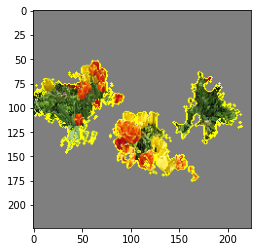

In [122]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**Without Mask**

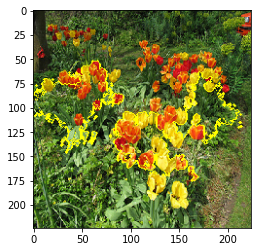

In [123]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**We can also see the 'pros and cons' (pros in green, cons in red)**

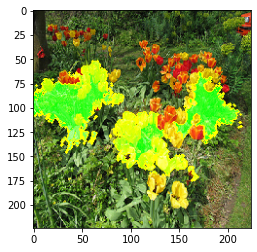

In [125]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**By increasing number of features**

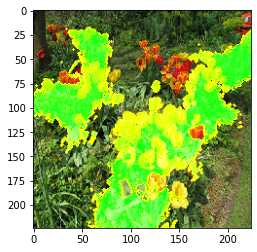

In [126]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**Alternatively, we can also plot explanation weights onto a heatmap visualization. The colorbar shows the values of the weights.**

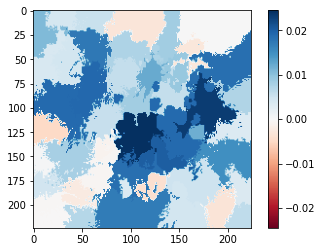

In [127]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

## **Rose**

In [ ]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(input_arr_m[0].astype('double'), new_model.predict, top_labels=5, hide_color=0, num_samples=1000)

**With Mask**

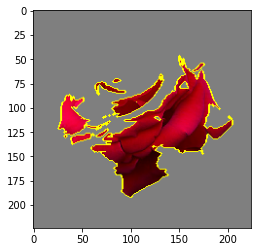

In [129]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**Without Mask**

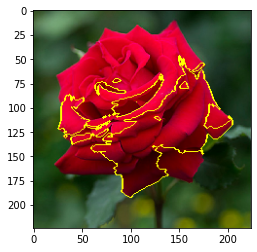

In [130]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**We can also see the 'pros and cons' (pros in green, cons in red)**

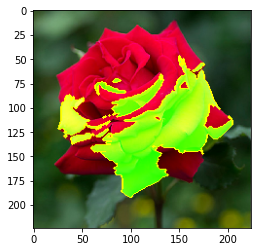

In [131]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**By increasing number of features**

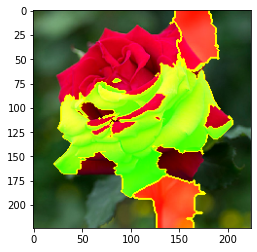

In [132]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

**Heat Map**

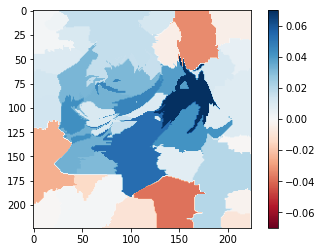

In [133]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# na